In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import ast

In [5]:
import os

file_path = "movies_metadata.csv"
file_extension = os.path.splitext(file_path)[1]
print(f"File extension: {file_extension}")

File extension: .csv


In [7]:
data = pd.read_csv(file_path, encoding='utf-8')
df = pd.DataFrame(data)
df.head(10)

C:\Users\compu maarouf\AppData\Local\Temp\ipykernel_17060\2532682300.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='utf-8')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [9]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

columns_to_drop = [
    'homepage', 'overview', 'tagline', 'video', 'imdb_id',
    'spoken_languages', 'poster_path', 'title', 'id'
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns],
        inplace=True, errors='ignore')

numeric_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'popularity']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].replace(0, np.nan)
        df[col] = df[col].fillna(df[col].mean())

 
if 'belongs_to_collection' in df.columns:
    df['belongs_to_collection'] = df['belongs_to_collection'].notna().astype(int)


if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df.drop('release_date', axis=1, inplace=True)


if 'original_language' in df.columns:
    top_lang = df['original_language'].value_counts().index[0]  # اللغة الأكثر شيوعاً
    df['original_language'] = df['original_language'].apply(lambda x: x if x == top_lang else 'other')


def extract_genre(genre_str):
    try:
        if isinstance(genre_str, str) and genre_str.strip() != '':
            genre_list = ast.literal_eval(genre_str)
            if genre_list and isinstance(genre_list, list):
                return genre_list[0]['name'] if 'name' in genre_list[0] else 'Unknown'
    except (ValueError, SyntaxError):
        pass
    return 'Unknown'

if 'genres' in df.columns:
    df['genres'] = df['genres'].apply(extract_genre)

if 'status' in df.columns:
    df['status'] = df['status'].apply(lambda x: 1 if x == 'Released' else 0)

if 'revenue' in df.columns:
    y = df['revenue']
    X = df.drop('revenue', axis=1)
else:
    raise ValueError("عمود 'revenue' غير موجود في DataFrame")

for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

cat_cols = [col for col in ['original_language', 'genres'] if col in X.columns]
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

ct = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

X_transformed = ct.fit_transform(X)

print("Data format after transformation:", X_transformed.shape)
print(y.head())

Data format after transformation: (45466, 35)
0    3.735540e+08
1    2.627972e+08
2    6.878739e+07
3    8.145216e+07
4    7.657891e+07
Name: revenue, dtype: float64


In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X_transformed, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 27279 samples
Validation set size: 9093 samples
Test set size: 9094 samples


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

y_class = y.apply(lambda x: 'High' if x >= y.median() else 'Low')

y_train_class = y_class[y_train.index]
y_val_class = y_class[y_val.index]
y_test_class = y_class[y_test.index]

k_values = [3, 5, 7, 9]
val_accuracies = []

for k in k_values:
    knn_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    knn_pipeline.fit(X_train, y_train_class)
    y_pred_val = knn_pipeline.predict(X_val)
    acc = accuracy_score(y_val_class, y_pred_val)
    val_accuracies.append(acc)
    print(f"K = {k}, Validation Accuracy = {acc:.4f}")

K = 3, Validation Accuracy = 0.8820
K = 5, Validation Accuracy = 0.8839
K = 7, Validation Accuracy = 0.8880
K = 9, Validation Accuracy = 0.8899


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='mean')  # يستخدم المتوسط لملء القيم المفقودة
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_imputed, y_train_class)
    y_pred_val = knn.predict(X_val_imputed)
    acc = accuracy_score(y_val_class, y_pred_val)
    accuracies.append((k, acc))
    print(f"K = {k}, Validation Accuracy = {acc:.4f}")

best_k, best_acc = max(accuracies, key=lambda x: x[1])
print(f"\nthe best k: {best_k} with accuracy: {best_acc:.4f}")

K = 3, Validation Accuracy = 0.8825
K = 5, Validation Accuracy = 0.8874
K = 7, Validation Accuracy = 0.8913
K = 9, Validation Accuracy = 0.8946
K = 11, Validation Accuracy = 0.8941

the best k: 9 with accuracy: 0.8946


In [19]:
from sklearn.model_selection import cross_val_score

k_folds = 5

knn = KNeighborsClassifier(n_neighbors=best_k)
cross_val_scores = cross_val_score(knn, X_train_imputed, y_train_class, cv=k_folds, scoring='accuracy')

mean_accuracy = cross_val_scores.mean()

print(f"\n mean of accuracy {k_folds}-Fold Cross-Validation = {mean_accuracy:.4f}")


 mean of accuracy 5-Fold Cross-Validation = 0.8897


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

df['success'] = (df['revenue'] > df['revenue'].median()).astype(int)

data = df[['vote_average', 'budget', 'runtime', 'success']].dropna()

X = data[['vote_average', 'budget', 'runtime']]
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
 [[12964   121]
 [  247   308]]
Accuracy: 0.97
Precision: 0.72
Recall: 0.55
F1-Score: 0.63


In [47]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

if train_score > test_score + 0.15:
    print("Overfitting detected")

Train Accuracy: 1.00
Test Accuracy: 0.97


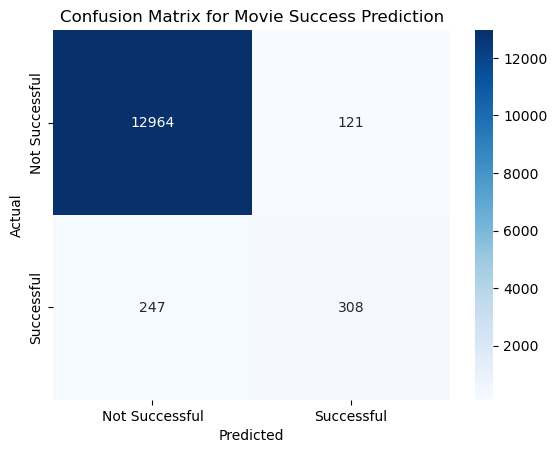

In [49]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Successful', 'Successful'], 
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Movie Success Prediction')
plt.show()